# Predicting if the passenger survived or not using Titanic dataset

In [1]:
##Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing train data

train=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\Titanic\train.csv")
train.head()
train.shape


(891, 12)

In [3]:
## Importing train data

test=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\Titanic\test.csv")
test.head()
test.shape

(418, 11)

In [4]:
train_features=train.drop('Survived',axis=1)
train_features.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [5]:
train_response=train.iloc[:,1]
train_response.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
df=pd.concat([train_features,test],axis=0)
df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [7]:
## Knowing our data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [8]:
##Summarising Data

df.describe()

PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    14.413493     1.041658     0.865560   
min       1.000000     1.000000     0.170000     0.000000     0.000000   
25%     328.000000     2.000000    21.000000     0.000000     0.000000   
50%     655.000000     3.000000    28.000000     0.000000     0.000000   
75%     982.000000     3.000000    39.000000     1.000000     0.000000   
max    1309.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200

<AxesSubplot:xlabel='Sex', ylabel='count'>

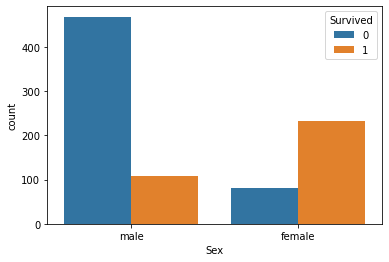

In [9]:
## Countplot for visualing male and female survivals 

sns.countplot(x ='Sex', hue = "Survived", data = train)

Text(0, 0.5, 'No. of Survivals')

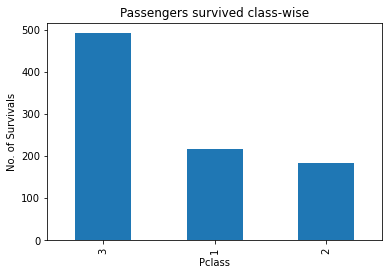

In [10]:
plt = train.Pclass.value_counts().plot(kind='bar',title='Passengers survived class-wise')
plt.set_xlabel('Pclass')
plt.set_ylabel('No. of Survivals')

In [11]:
## Checking null values

df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

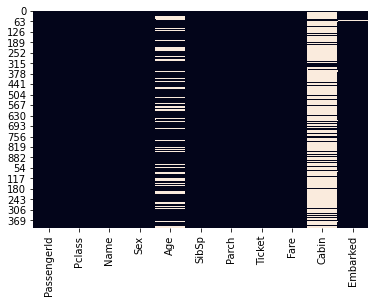

In [12]:
## Plotting null values

sns.heatmap(df.isnull(), cbar=False)

In [13]:
df1=df.drop(['Cabin','Ticket','PassengerId'],axis=1)
df1.head()

Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch     Fare Embarked  
0      1      0   7.2500        S  
1      1      0  71.2833        C  
2      0      0   7.9250        S  
3      1      0  53.1000        S  
4      0      0   8.0500        S

In [14]:
df1["Age"].fillna(df1["Age"].mean(),inplace=True)
df1["Fare"].fillna(df1["Fare"].mean(),inplace=True)
df1["Embarked"].fillna(df1["Embarked"].mode()[0],inplace=True)

In [15]:
df1.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

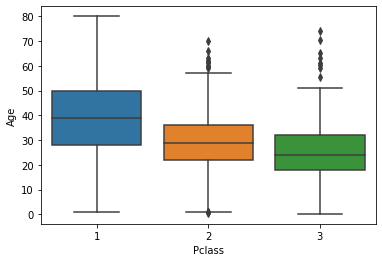

In [16]:
##Box-plot for visualising Age of people Pclass-wise

sns.boxplot(x="Pclass", y="Age", data=df)

In [17]:
## Here the boxplot represnts that the passengers of Pclass 1 had greater median age than passengers of Pclass 2 and Pclass 3.

In [18]:
## Getting Dummy variables for Sex and Pclass

sex=pd.get_dummies(df1['Sex'],drop_first=True)
pcls=pd.get_dummies(df1['Pclass'],drop_first=True)
embarked=pd.get_dummies(df1['Embarked'],drop_first=True)
embarked

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[1309 rows x 2 columns]

In [19]:
## Rearranging the dataframe adding the columns with dummy variables and dropping extra columns like Pclass,Name and Sex.

titanic=pd.concat([df1,sex,pcls,embarked],axis=1)
titanic.drop(['Pclass','Name','Sex','Embarked'],axis=1,inplace=True)
titanic.head()

Age  SibSp  Parch     Fare  male  2  3  Q  S
0  22.0      1      0   7.2500     1  0  1  0  1
1  38.0      1      0  71.2833     0  0  0  0  0
2  26.0      0      0   7.9250     0  0  1  0  1
3  35.0      1      0  53.1000     0  0  0  0  1
4  35.0      0      0   8.0500     1  0  1  0  1

In [20]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

# Using fit and transform method 
scaling.fit(titanic)
tit_data=pd.DataFrame(scaling.transform(titanic),columns=titanic.columns)
tit_data.head()

Age     SibSp  Parch      Fare      male         2         3        Q  \
0 -0.611972  0.481288 -0.445 -0.503595  0.743497 -0.518084  0.919925 -0.32204   
1  0.630431  0.481288 -0.445  0.734503 -1.344995 -0.518084 -1.087045 -0.32204   
2 -0.301371 -0.479087 -0.445 -0.490544 -1.344995 -0.518084  0.919925 -0.32204   
3  0.397481  0.481288 -0.445  0.382925 -1.344995 -0.518084 -1.087045 -0.32204   
4  0.397481 -0.479087 -0.445 -0.488127  0.743497 -0.518084  0.919925 -0.32204   

          S  
0  0.655011  
1 -1.526692  
2  0.655011  
3  0.655011  
4  0.655011

In [21]:
x = tit_data[0:891]
x

Age     SibSp     Parch      Fare      male         2         3  \
0   -0.611972  0.481288 -0.445000 -0.503595  0.743497 -0.518084  0.919925   
1    0.630431  0.481288 -0.445000  0.734503 -1.344995 -0.518084 -1.087045   
2   -0.301371 -0.479087 -0.445000 -0.490544 -1.344995 -0.518084  0.919925   
3    0.397481  0.481288 -0.445000  0.382925 -1.344995 -0.518084 -1.087045   
4    0.397481 -0.479087 -0.445000 -0.488127  0.743497 -0.518084  0.919925   
..        ...       ...       ...       ...       ...       ...       ...   
886 -0.223721 -0.479087 -0.445000 -0.392417  0.743497  1.930190 -1.087045   
887 -0.844922 -0.479087 -0.445000 -0.063719 -1.344995 -0.518084 -1.087045   
888  0.000000  0.481288  1.866526 -0.190364 -1.344995 -0.518084  0.919925   
889 -0.301371 -0.479087 -0.445000 -0.063719  0.743497 -0.518084 -1.087045   
890  0.164530 -0.479087 -0.445000 -0.493927  0.743497 -0.518084  0.919925   

            Q         S  
0   -0.322040  0.655011  
1   -0.322040 -1.526692  
2   -0.322040  0.655011  
3   -0.322040  0.655011  
4   -0.322040  0.655011  
..        ...       ...  
886 -0.322040  0.655011  
887 -0.322040  0.655011  
888 -0.322040  0.655011  
889 -0.322040 -1.526692  
890  3.105202 -1.526692  

[891 rows x 9 columns]

In [22]:
y = train.iloc[:,1]

In [23]:
x_test=tit_data[891:]
x_test.head()

Age     SibSp     Parch      Fare      male         2         3  \
891  0.358655 -0.479087 -0.445000 -0.492396  0.743497 -0.518084  0.919925   
892  1.329283  0.481288 -0.445000 -0.508429 -1.344995 -0.518084  0.919925   
893  2.494035 -0.479087 -0.445000 -0.456465  0.743497  1.930190 -1.087045   
894 -0.223721 -0.479087 -0.445000 -0.476284  0.743497 -0.518084  0.919925   
895 -0.611972  0.481288  0.710763 -0.406194 -1.344995 -0.518084  0.919925   

            Q         S  
891  3.105202 -1.526692  
892 -0.322040  0.655011  
893  3.105202 -1.526692  
894 -0.322040  0.655011  
895 -0.322040  0.655011

## 1. Logistic Regression

In [24]:
## Fitting Logistic Regression 

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(x,y)

LogisticRegression(max_iter=1000)

In [25]:
print(logmodel.score(x,y),'\n')
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y,logmodel.predict(x))))

0.8047138047138047 

0.4419119768530779


In [26]:
## Predicting values for test data
y_predict=logmodel.predict(x_test)


## 2. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x,y)

RandomForestClassifier()

In [28]:
print("score:",rfc.score(x,y),'\n')
from sklearn.metrics import mean_squared_error
print("rmse:",np.sqrt(mean_squared_error(y,rfc.predict(x))))

score: 0.9820426487093153 

rmse: 0.13400504203456162


In [29]:
y_est=rfc.predict(x_test)


## 3. SVM

In [30]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8,test_size=0.2,random_state=5)

#Train the model using the training sets
clf.fit(x_train, y_train)
print("score_train:",clf.score(x_train,y_train),'\n')
print("score_valid:",clf.score(x_valid,y_valid),'\n')

from sklearn.metrics import mean_squared_error
print("rmse_train:",np.sqrt(mean_squared_error(y_train,clf.predict(x_train))),"\n")
print("rmse_valid:",np.sqrt(mean_squared_error(y_valid,clf.predict(x_valid))),"\n")

from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_valid, clf.predict(x_valid)))

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test)
#y_pred_svm

score_train: 0.7851123595505618 

score_valid: 0.7932960893854749 

rmse_train: 0.46355974852163145 

rmse_valid: 0.454647017602145 

accuracy: 0.7932960893854749


## 4. KNN

In [31]:
## Using knn

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8,test_size=0.2,random_state=5)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print("score_train:",knn.score(x_train,y_train),"\n")
print("score_valid:",knn.score(x_valid,y_valid),"\n")

from sklearn.metrics import mean_squared_error
print("rmse_train:",np.sqrt(mean_squared_error(y_train,knn.predict(x_train))),"\n")
print("rmse_valid:",np.sqrt(mean_squared_error(y_valid,knn.predict(x_valid))),"\n")

from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_valid, knn.predict(x_valid)))

y_pred=knn.predict(x_test)
y_pred

score_train: 0.8497191011235955 

score_valid: 0.8491620111731844 

rmse_train: 0.3876608038948541 

rmse_valid: 0.38837866680189276 

accuracy: 0.8491620111731844


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,